In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools

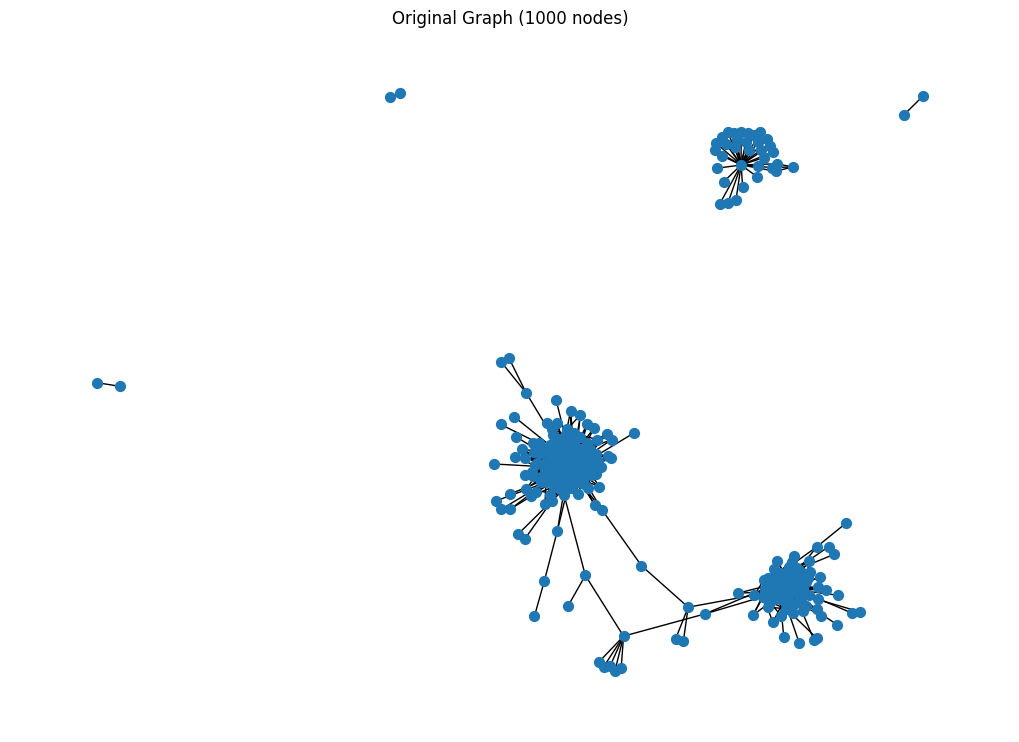

In [21]:
edges_df = pd.read_csv('edges_sampled_2K.csv')
edges_df.columns = ['source', 'target']

G = nx.Graph()
G.add_edges_from(edges_df.values)

def draw_original_graph(G, nodes_to_draw=1000):
    plt.figure(figsize=(10, 7))
    subgraph = G.subgraph(list(G.nodes)[:nodes_to_draw])
    pos = nx.spring_layout(subgraph, seed=42)
    nx.draw(subgraph, pos, with_labels=False, node_size=50)
    plt.title("Original Graph ({} nodes)".format(nodes_to_draw))
    plt.show()

draw_original_graph(G, nodes_to_draw=1000)

In [22]:
def compute_communities(G, desired_communities=4):
    G_copy = G.copy()
    while nx.number_connected_components(G_copy) < desired_communities:
        edge_betweenness = nx.edge_betweenness_centrality(G_copy)
        max_centrality = max(edge_betweenness.values())
        edges_to_remove = [edge for edge, val in edge_betweenness.items() if val == max_centrality]
        G_copy.remove_edges_from(edges_to_remove)
    return list(nx.connected_components(G_copy)), G_copy

communities, new_graph = compute_communities(G, desired_communities=7)

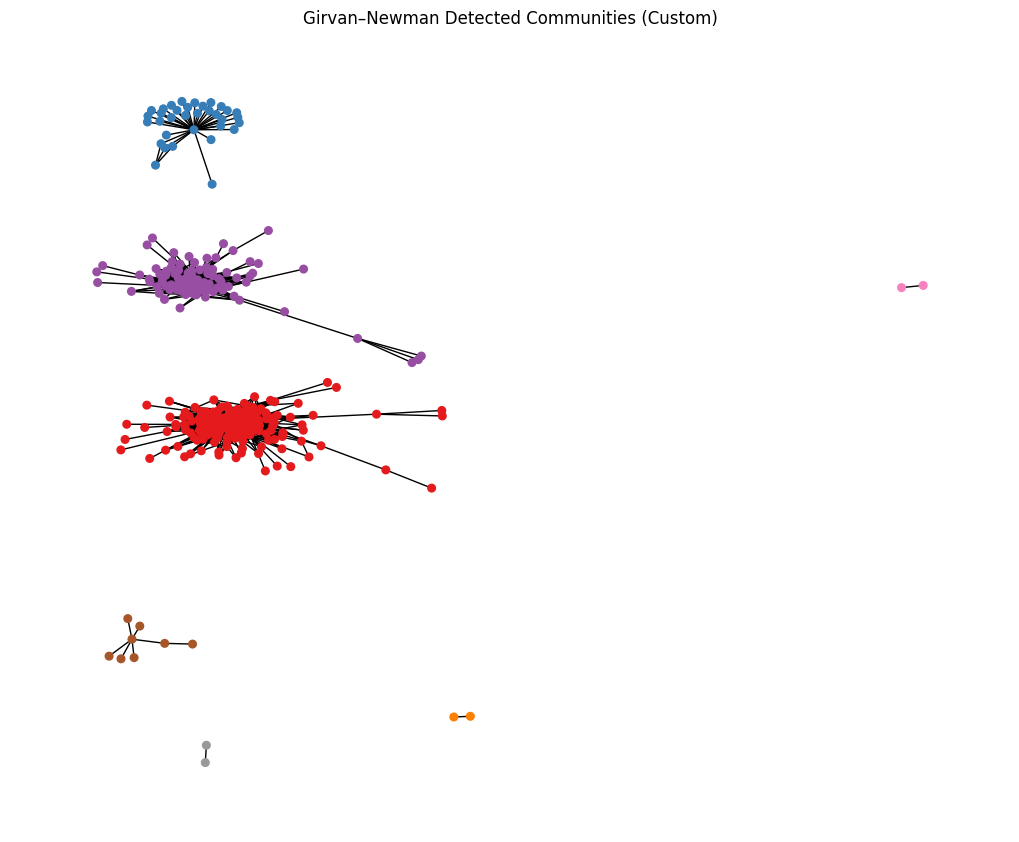

In [23]:
def draw_communities_custom(G, communities):
    color_map = {}
    for i, community in enumerate(communities):
        for node in community:
            color_map[node] = i
    node_colors = [color_map.get(node, 0) for node in G.nodes()]
    
    plt.figure(figsize=(10, 8))
    nx.draw(G, node_color=node_colors, with_labels=False, node_size=30, cmap=plt.cm.Set1)
    plt.title("Girvan–Newman Detected Communities (Custom)")
    plt.show()

draw_communities_custom(new_graph, communities)

In [12]:
import pandas as pd
community_truth = pd.read_csv('community_membership_2k.csv', header=None)
community_truth.columns = ['node', 'community']
community_truth.set_index('node', inplace=True)


community
0    177
2    101
1     34
3      2
4      2
5      2
Name: count, dtype: int64
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, np.int64(0), -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 

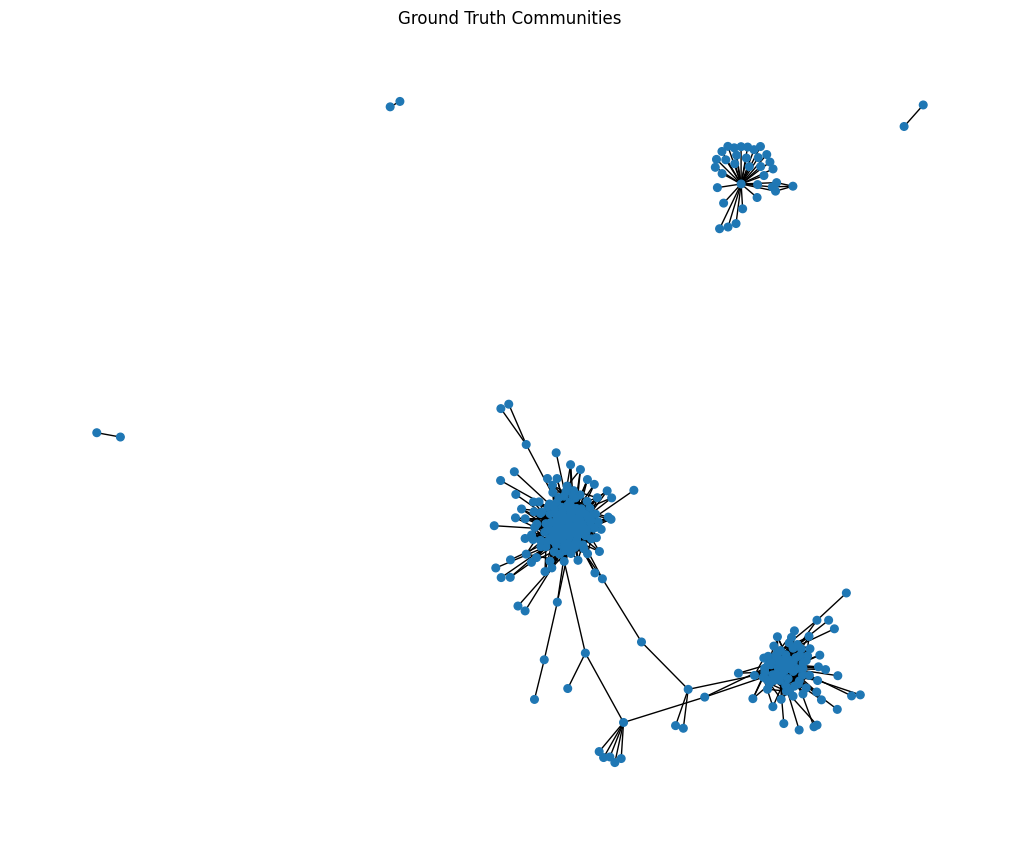

In [18]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_ground_truth_communities(G, truth_df):
    node_colors = [truth_df.loc[int(node), 'community'] if int(node) in truth_df.index else -1 for node in G.nodes()]
    print(node_colors)
    pos = nx.spring_layout(G, seed=42)

    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, node_color=node_colors, node_size=30, cmap=plt.cm.tab10, with_labels=False)
    plt.title("Ground Truth Communities")
    plt.show()


print(community_truth['community'].value_counts())
draw_ground_truth_communities(G, community_truth)
